In [1]:
import numpy as np
import sympy as sp
import matplotlib
import random
import matplotlib.pyplot as plt
%matplotlib inline 
%precision 5

u'%.5f'

In [2]:
## For the integration of the source term, 
## the source term function and shape function definitions are needed

# Shape functions in terms of the variable xi in [-1,1]
def N1(xi):
    return (1.-xi)/2.

def N2(xi):
    return (1.+xi)/2.

# Source term function
def bfunc(x):
    return 10.*(x*x-1)


In [10]:
## Finite element solution for PROBLEM 1

# pre processing 
#n_ele = 2
#n_ele = 4
#n_ele = 8
n_ele = 16
#n_node = 3
#n_node = 5
#n_node = 9
n_node = 17
#node_X = np.array([0.,0.5,1.0])
#node_X = np.array([0.,0.25,0.5,0.75,1.0])
#node_X = np.array([0.,0.125,0.25,0.375,0.5,0.625,0.75,0.875,1.0])
node_X = np.linspace(0.,1.0,17)
#elements = np.array([[1,2],[2,3]])
#elements = np.array([[1,2],[2,3],[3,4],[4,5]])
#elements = np.array([[1,2],[2,3],[3,4],[4,5],[5,6],[6,7],[7,8],[8,9]])
elements = np.array([[1,2],[2,3],[3,4],[4,5],[5,6],[6,7],[7,8],[8,9],[9,10],[10,11],[11,12],[12,13],[13,14],[14,15],[15,16],[16,17]])
#A_element = np.array([2.,1.])
#A_element = np.array([2.,2.,1.,1.])
#A_element = np.array([2.,2.,2.,2.,1.,1.,1.,1.])
A_element = np.array([2.,2.,2.,2.,2.,2.,2.,2.,1.,1.,1.,1.,1.,1.,1.,1.])
E = 1.

# assemble global stiffness and force vector
K = np.zeros((n_node,n_node))
F = np.zeros((n_node))

# Loop over elements 
for i in range(n_ele):
    
    # Beginning and end 'x' coordinates of this element 
    x1e = node_X[elements[i,0]-1]
    x2e = node_X[elements[i,1]-1]
    le = x2e-x1e 
    
    # stiffness matrix for this element (already derived)
    Ke = (A_element[i]*E/le)*np.array([[1.,-1],[-1.,1]])
    
    # Assemble into global stiffness 
    K[elements[i,0]-1,elements[i,0]-1] += Ke[0,0]
    K[elements[i,0]-1,elements[i,1]-1] += Ke[0,1]
    K[elements[i,1]-1,elements[i,0]-1] += Ke[1,0]
    K[elements[i,1]-1,elements[i,1]-1] += Ke[1,1]
    
    # for the source term do Gauss quadrature
    gauss_1 = np.array([[0,2]])
    gauss_3 = np.array([[-np.sqrt(3./5.),5./9.],[0,8./9.],[np.sqrt(3./5.),5./9.]])
    Je = le/2.
    fe = np.zeros((2))
    for ip in range(len(gauss_1)):
        x_ip = (x1e+x2e)/2. + gauss_1[ip,0]*Je
        fe[0] += Je*gauss_1[ip,1]*N1(gauss_1[ip,0])*bfunc(x_ip)
        fe[1] += Je*gauss_1[ip,1]*N2(gauss_1[ip,0])*bfunc(x_ip)
    
    # assembly
    F[elements[i,0]-1] += fe[0]
    F[elements[i,1]-1] += fe[1]

In [11]:
# solving the system with matrix partitioning 
n_E = 1 # the first node has an essential boundary condition
n_F = n_node-n_E
K_E = K[0:n_E,0:n_E]
K_F = K[n_E:,n_E:]
K_EF = K[0:n_E,n_E:]
# known displacement
u_E = np.array([0.])
# known external forces
F_F = F[n_E:]
# solving A\b
u_F = np.linalg.solve(K_F,F_F- np.dot(K_EF.transpose(),u_E))
#print(u_F)
# Assemble the vector with all degrees of fredom [u_E,u_F]
u = np.zeros((n_node))
u[0:n_E] = u_E
u[n_E:] = u_F
print(u)

[ 0.      -0.19868 -0.37792 -0.53796 -0.67917 -0.80209 -0.9074  -0.99595
 -1.06873 -1.18502 -1.27464 -1.3405  -1.3858  -1.41405 -1.42906 -1.43496
 -1.43616]


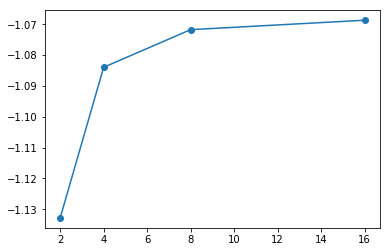

In [14]:
umidpoint_P1 = [ -1.13281, -1.08398, -1.07178, -1.06873 ]
plt.plot([2,4,8,16],umidpoint_P1,'o-')

In [24]:
## Finite element solution for PROBLEM 2

# pre processing 
#n_ele = 2
#n_ele = 4
#n_ele = 8
n_ele = 16
#n_node = 3
#n_node = 5
#n_node = 9
n_node = 17
#node_X = np.array([0.,1.0,0.5])
#node_X = np.array([0.,1.0,0.25,0.5,0.75])
#node_X = np.array([0.,1.0,0.125,0.25,0.375,0.5,0.625,0.75,0.875])
aux = np.linspace(0.,1.,17)
node_X = np.zeros((n_node))
node_X[0] = 0.
node_X[1] = 1.
node_X[2:] = aux[1:-1]
#elements = np.array([[1,3],[3,2]])
#elements = np.array([[1,3],[3,4],[4,5],[5,2]])
#elements = np.array([[1,3],[3,4],[4,5],[5,6],[6,7],[7,8],[8,9],[9,2]])
elements = np.array([[1,3],[3,4],[4,5],[5,6],[6,7],[7,8],[8,9],[9,10],[10,11],[11,12],[12,13],[13,14],[14,15],[15,16],[16,17],[17,2]])
#A_element = np.array([2.,1.])
#A_element = np.array([2.,2.,1.,1.])
#A_element = np.array([2.,2.,2.,2.,1.,1.,1.,1.])
A_element = np.array([2.,2.,2.,2.,2.,2.,2.,2.,1.,1.,1.,1.,1.,1.,1.,1.])
E = 1.

# assemble global stiffness and force vector
K = np.zeros((n_node,n_node))
F = np.zeros((n_node))

# Loop over elements 
for i in range(n_ele):
    
    # Beginning and end 'x' coordinates of this element 
    x1e = node_X[elements[i,0]-1]
    x2e = node_X[elements[i,1]-1]
    le = x2e-x1e 
    
    # stiffness matrix for this element (already derived)
    Ke = (A_element[i]*E/le)*np.array([[1.,-1],[-1.,1]])
    
    # Assemble into global stiffness 
    K[elements[i,0]-1,elements[i,0]-1] += Ke[0,0]
    K[elements[i,0]-1,elements[i,1]-1] += Ke[0,1]
    K[elements[i,1]-1,elements[i,0]-1] += Ke[1,0]
    K[elements[i,1]-1,elements[i,1]-1] += Ke[1,1]
    
    # for the source term do Gauss quadrature
    gauss_1 = np.array([[0,2]])
    gauss_3 = np.array([[-np.sqrt(3./5.),5./9.],[0,8./9.],[np.sqrt(3./5.),5./9.]])
    Je = le/2.
    fe = np.zeros((2))
    for ip in range(1):
        x_ip = (x1e+x2e)/2. + gauss_1[ip,0]*Je
        fe[0] += Je*gauss_1[ip,1]*N1(gauss_1[ip,0])*bfunc(x_ip)
        fe[1] += Je*gauss_1[ip,1]*N2(gauss_1[ip,0])*bfunc(x_ip)
    
    # assembly
    F[elements[i,0]-1] += fe[0]
    F[elements[i,1]-1] += fe[1]

In [25]:
# solving the system with matrix partitioning 
n_E = 2 # the first node has an essential boundary condition
n_F = n_node-n_E
K_E = K[0:n_E,0:n_E]
K_F = K[n_E:,n_E:]
K_EF = K[0:n_E,n_E:]
# known displacements
u_E = np.array([0.,0.])
# known external forces
F_F = F[n_E:]
# solving A\b
u_F = np.linalg.solve(K_F,F_F- np.dot(K_EF.transpose(),u_E))
#print(u_F)
# Assemble the vector with all degrees of fredom [u_E,u_F]
u = np.zeros((n_node))
u[0:n_E] = u_E
u[n_E:] = u_F
print(u)

[ 0.       0.      -0.13884 -0.25824 -0.35844 -0.43981 -0.50289 -0.54836
 -0.57707 -0.59001 -0.58662 -0.55656 -0.50275 -0.42837 -0.33693 -0.23226
 -0.11848]


In [27]:
umidpoint_P2 = [-0.57292, -0.58594, -0.58919, -0.59001 ]

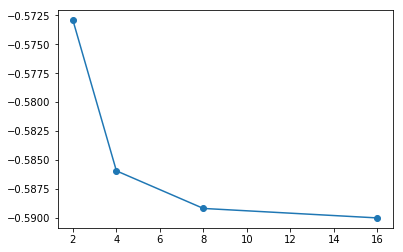

In [28]:
plt.plot([2,4,8,16],umidpoint_P2,'o-')